In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [230]:
train = pd.read_csv('train_users_2.csv')
session = pd.read_csv('sessions.csv')


In [231]:
train['gender'] = train['gender'].astype(str)
train = train.replace('-unknown-', np.nan)
train['gender'] = train['gender'].replace('nan', np.nan)

In [232]:
session['action'] = session['action'].replace('-unknown-', np.nan)
session['action_type'] = session['action_type'].replace('-unknown-', np.nan)
session['action_detail'] = session['action_detail'].replace('-unknown-', np.nan)
session['device_type'] = session['device_type'].replace('-unknown-', np.nan)
session = session.rename(columns={'user_id': 'id'})

In [233]:
sec = session.groupby(['id']).sum()

In [234]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [235]:
df2 = pd.merge(train,session)


In [236]:
secs = df2.groupby(['id']).sum()
secs.head()

,timestamp_first_active,age,signup_flow,secs_elapsed
id,,,,
00023iyk9l,805620567818080,1240.0,0,867896.0
001wyh0pz8,1812638175409440,0.0,2070,282965.0
0028jgx1x1,624359254423609,0.0,0,297010.0
002qnbzfs5,15890796280441576,20514.0,19725,6487080.0
0035hobuyj,9848509986780006,0.0,0,5724670.0


In [237]:
df = pd.merge(train,secs)
df = df.dropna(subset=['country_destination'])
df.shape

(494, 17)

In [238]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [239]:
df.loc[df.age > 95, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan

In [240]:
df = df.dropna()
df.gender = df.gender.astype("category").cat.codes
df.signup_method = df.signup_method.astype("category").cat.codes
df.language = df.language.astype("category").cat.codes
df.affiliate_channel=df.affiliate_channel.astype("category").cat.codes
df.affiliate_provider=df.affiliate_provider.astype("category").cat.codes
df.first_affiliate_tracked = df.first_affiliate_tracked.astype("category").cat.codes
df.signup_app = df.signup_app.astype("category").cat.codes
df.first_device_type = df.first_device_type.astype("category").cat.codes
df.first_browser=df.first_browser.astype("category").cat.codes


/Users/irene/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/irene/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/irene/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/irene/anaconda3/lib/python3.7/site-packages/sta

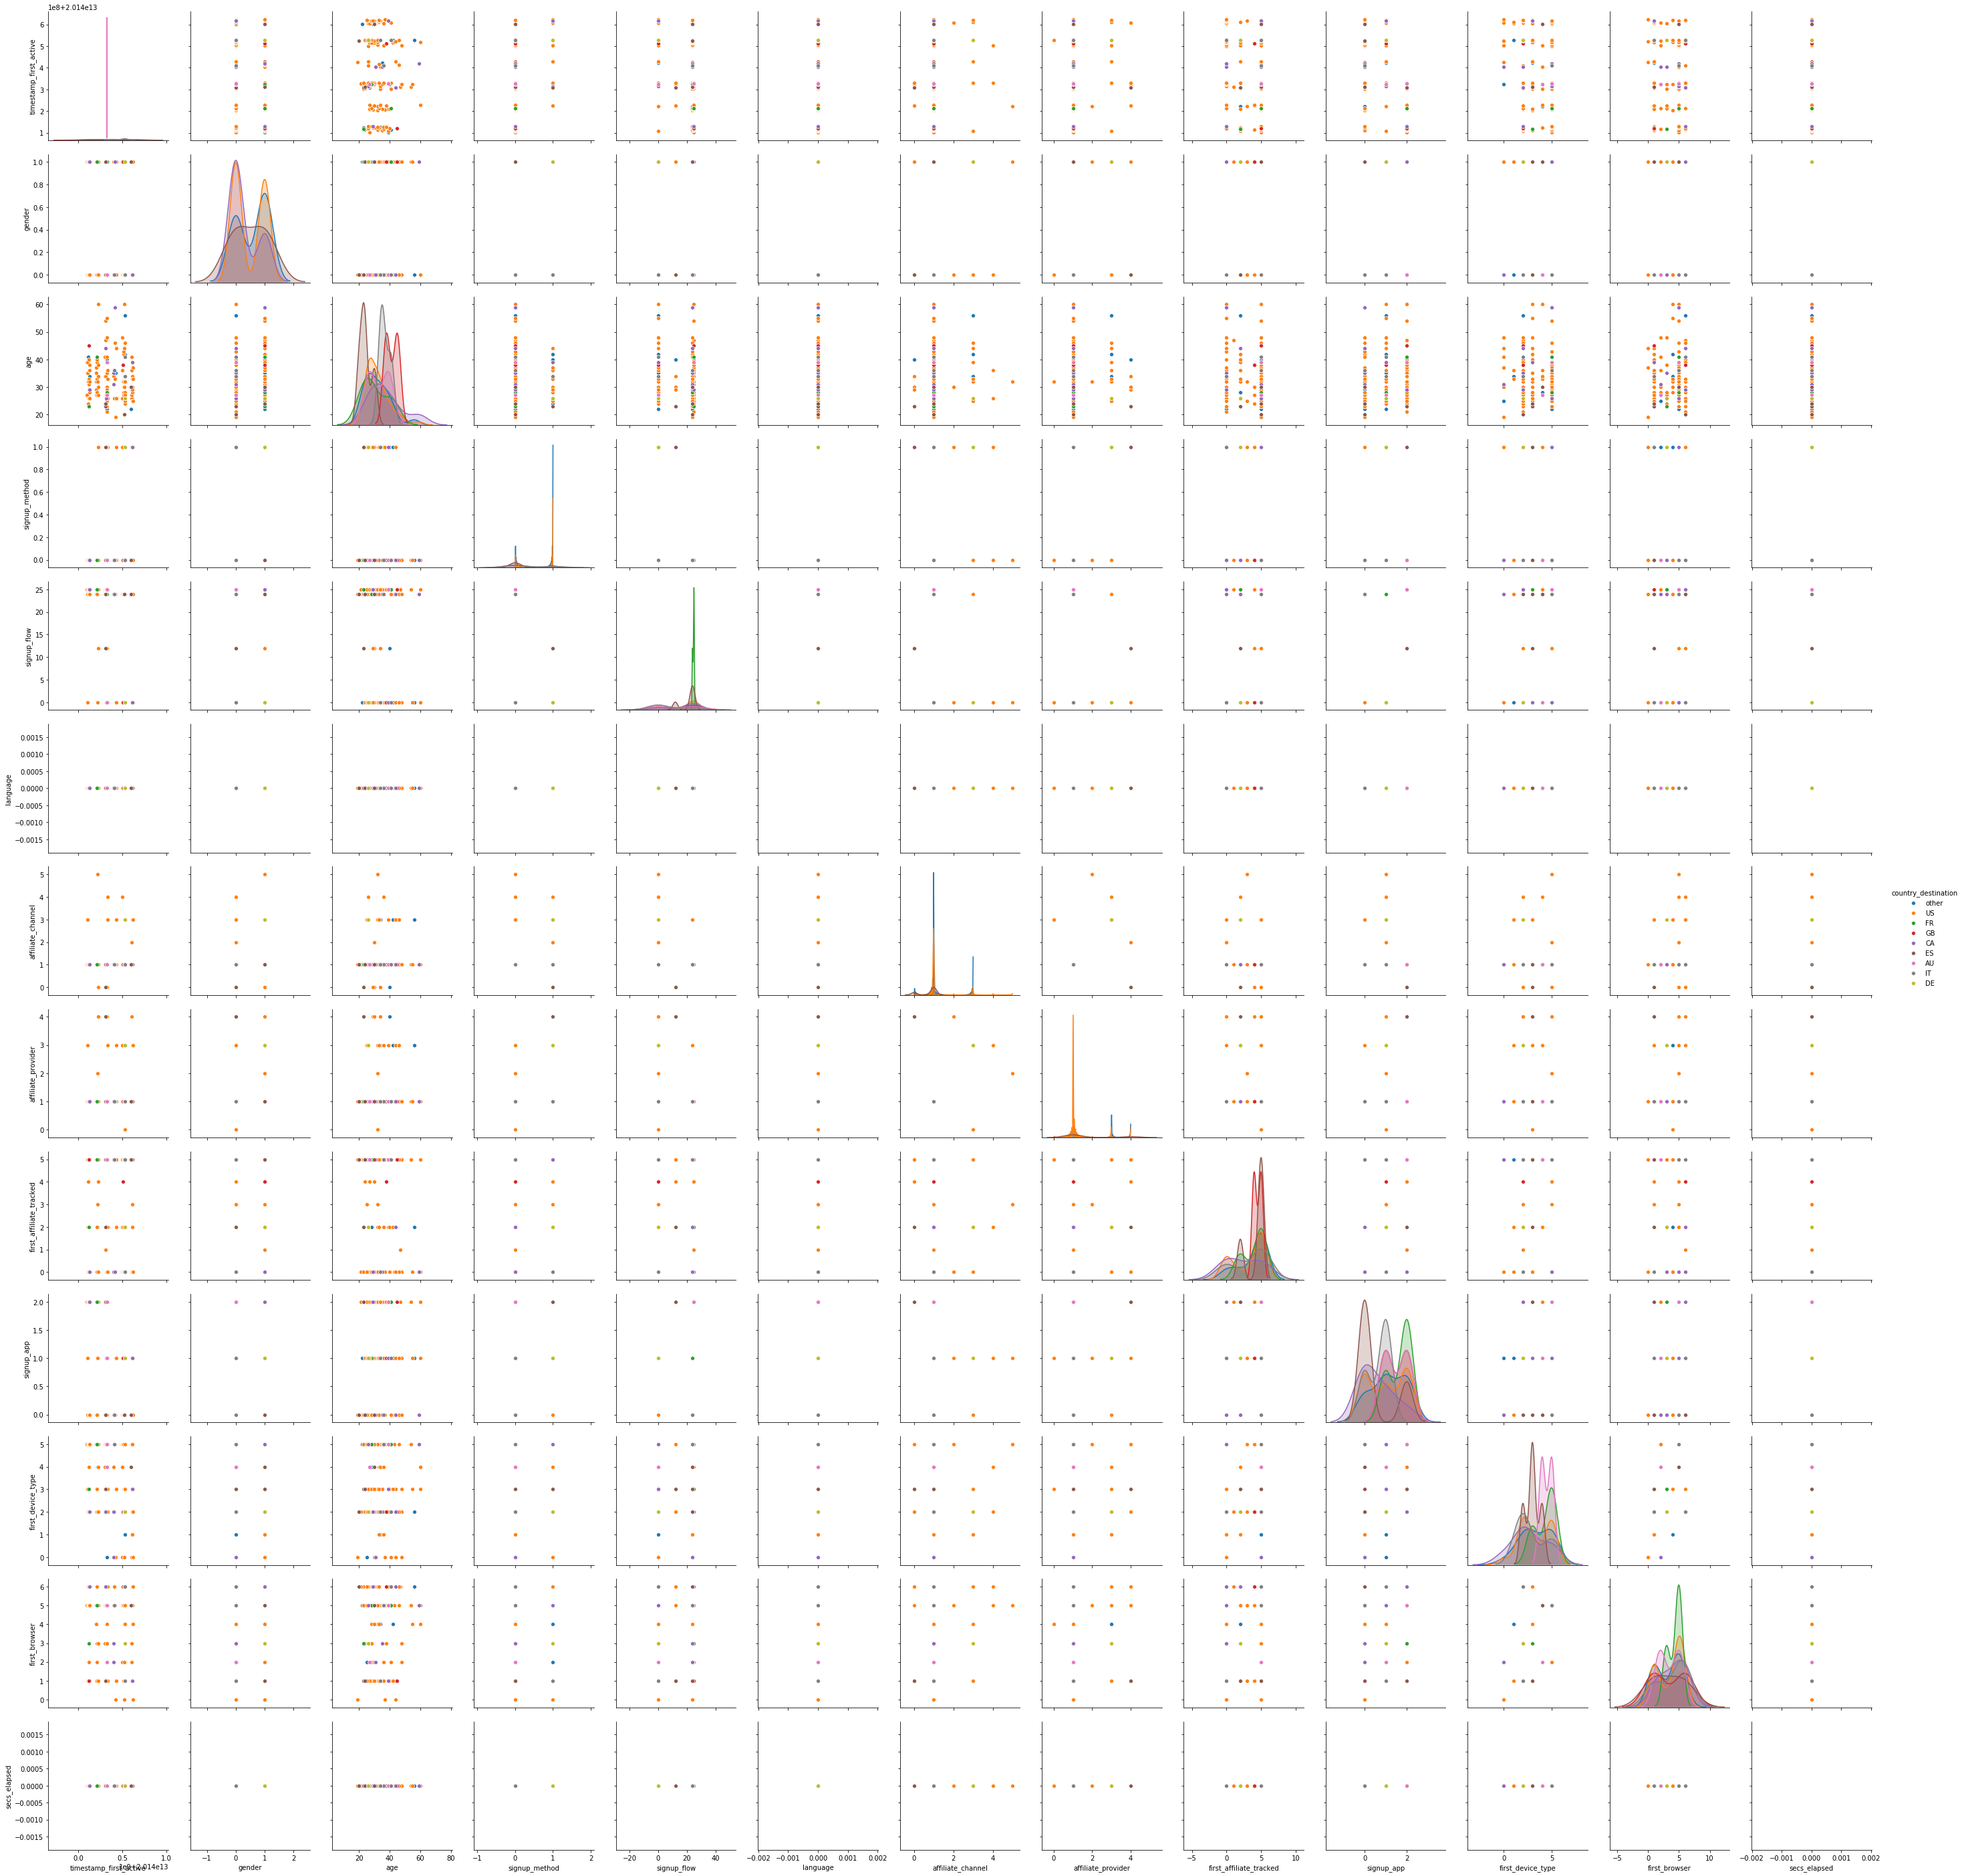

In [12]:
sns.pairplot(df, hue='country_destination', size=3)

In [ ]:
df.head()

In [241]:
X= df.drop(['id','country_destination','date_account_created','date_first_booking'], axis=1).values
X.reshape(-1,1)

array([[2.01401021e+13],
       [1.00000000e+00],
       [3.90000000e+01],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])

In [242]:
y= df['country_destination'].values

In [243]:
y=y.reshape(-1,1)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [66]:
reg= LogisticRegression()

In [67]:
cv_results = cross_val_score(reg, X_train,y_train, cv=10, error_score='raise')
print("Average 10-Fold CV Score: {}".format(np.mean(cv_results)))

Average 10-Fold CV Score: 0.7386760461760461


/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [69]:

knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app',
'first_device_type','first_browser','age']]
y = df['country_destination']

clf = LogisticRegression()

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [73]:
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.7692307692307693


/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Regularize 

array([[2.01401021e+13, 1.00000000e+00, 3.90000000e+01, ...,
        5.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [2.01401022e+13, 0.00000000e+00, 2.70000000e+01, ...,
        5.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [2.01401082e+13, 1.00000000e+00, 3.90000000e+01, ...,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.01406190e+13, 0.00000000e+00, 3.30000000e+01, ...,
        3.00000000e+00, 4.00000000e+00, 0.00000000e+00],
       [2.01406202e+13, 1.00000000e+00, 2.50000000e+01, ...,
        2.00000000e+00, 6.00000000e+00, 0.00000000e+00],
       [2.01406230e+13, 1.00000000e+00, 3.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [54]:
X_train, X_test, y_train2, y_test2 = train_test_split(X,yn,test_size=0.3, random_state=42)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1
              , normalize= True)
ridge.fit(X_train, y_train2)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test2)

SyntaxError: invalid syntax (<ipython-input-58-7efcddd68804>, line 4)

In [102]:
df.country_=df.country_destination.astype("category").cat.codes


In [79]:
df.country_destination=df.country_destination.astype("category").cat.codes
X=df.drop(['country_destination'],axis=1).values
yn= df['country_destination'].values
X.reshape(-1,1)
yn.reshape(-1,1)

from sklearn.linear_model import Lasso
names = df.drop('country_destination', axis=1).columns


/Users/irene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


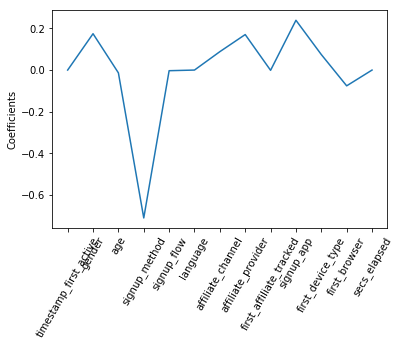

In [101]:
lasso = Lasso(alpha=0)
lasso_coef=lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')


In [105]:
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used= np.sum(lasso.coef_!=0)


/Users/irene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """Entry point for launching an IPython kernel.
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [107]:

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.06519018385253261
test score:  -0.1931413474535526
number of features used:  9


In [108]:
lasso = Lasso(alpha=0.01)
lasso_coef=lasso.fit(X, y).coef_
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used= np.sum(lasso.coef_!=0)


In [109]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.06451314269149633
test score:  -0.19101502783423774
number of features used:  8


In [124]:
lasso = Lasso(alpha=0.001)
lasso_coef=lasso.fit(X, y).coef_
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used= np.sum(lasso.coef_!=0)


In [125]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.06518295807712193
test score:  -0.19293970973056385
number of features used:  8


In [120]:
lasso = Lasso(alpha=0.0001)
lasso_coef=lasso.fit(X, y).coef_
lasso.fit(X_train,y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)
coeff_used= np.sum(lasso.coef_!=0)


In [121]:
print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.06519011110919815
test score:  -0.19312218027245653
number of features used:  9


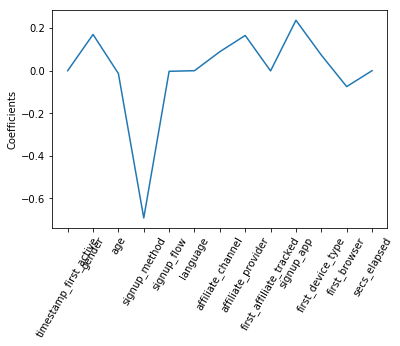

In [131]:
lasso = Lasso(alpha=0.001)
lasso_coef=lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')

comparing all alphas, a = 0.001 has higher training and test score.
it seems the the important features are age, gender, signup method,  langueage, affiliate channel , first affiliate tracked, first device tupe, first browser. 

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=6)

In [84]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [85]:
y_pred = knn.predict(X_test)

In [86]:
print('The "knn" confusion matrix: ', confusion_matrix(y_test, y_pred))
print('The "knn" classf. report: ', classification_report(y_test, y_pred))


The "knn" confusion matrix:  [[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0 51  0]
 [ 0  0  0  0  0  7  0]]
The "knn" classf. report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.78      1.00      0.88        51
           8       0.00      0.00      0.00         7

   micro avg       0.78      0.78      0.78        65
   macro avg       0.11      0.14      0.13        65
weighted avg       0.62      0.78      0.69        65



/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [87]:
logreg = LogisticRegression()

In [88]:
logreg.fit(X_train, y_train)

/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
y_pred =logreg.predict(X_test)

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0 50  1]
 [ 0  0  0  0  0  7  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.78      0.98      0.87        51
           8       0.00      0.00      0.00         7

   micro avg       0.77      0.77      0.77        65
   macro avg       0.11      0.14      0.12        65
weighted avg       0.61      0.77      0.68        65



/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [92]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0 50  1]
 [ 0  0  0  0  0  7  0]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.78      0.98      0.87        51
           8       0.00      0.00      0.00         7

   micro avg       0.77      0.77      0.77        65
   macro avg       0.11      0.14      0.12        65
weighted avg       0.61      0.77      0.68        65



/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


logistic regression, in classification problem 
for fining logistic regression, specify threshold and defines o
model. this is not particular for log reg but also could be used for KNN for exmaple 
true + false - for threshold
threhold = 0, predict 1 for all data which mans 
thresold = 1, model predict 0, both treu and false positive 0
,if we vary threshold, we get seires of different false positive nd true postive rate 

the set of points trying all postivle thresholds is called the recived operating chractersitc curve or ROC curve 

roc curve from 

In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [167]:
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X,y)
knn_cv.best_params_

/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 9}

In [168]:
knn_cv.best_score_

0.7407407407407407

In [165]:
c_space = np.logspace(-5, 8,15)
param_grid = {'C':c_space}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid , cv=5)
logreg_cv.fit(X,y)


/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/irene/anaconda3/lib/python3.7/

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [166]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.7345679012345679


In [172]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [173]:
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}


In [174]:
elastic_net = ElasticNet()

In [176]:
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train, y_train)

/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not co

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'l1_ratio': array([0.     , 0.03448, 0.06897, 0.10345, 0.13793, 0.17241, 0.2069 ,
       0.24138, 0.27586, 0.31034, 0.34483, 0.37931, 0.41379, 0.44828,
       0.48276, 0.51724, 0.55172, 0.58621, 0.62069, 0.65517, 0.68966,
       0.72414, 0.75862, 0.7931 , 0.82759, 0.86207, 0.89655, 0.93103,
       0.96552, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [177]:
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.9310344827586207}
Tuned ElasticNet R squared: -0.017544715615882334
Tuned ElasticNet MSE: 2.3828609269357486


# preprocessing data

In [180]:
pd.get_dummies(df)
print(df.columns)

Index(['timestamp_first_active', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'secs_elapsed'],
      dtype='object')


In [181]:
pd.get_dummies(df, drop_first = True)
print(df.columns)

Index(['timestamp_first_active', 'gender', 'age', 'signup_method',
       'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'secs_elapsed'],
      dtype='object')


In [182]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[-0.22961608  0.00610348 -0.11136608 -0.08342592 -0.07906805]


In [229]:
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
df

array([[2.01401021e+13, 1.00000000e+00, 3.90000000e+01, ...,
        5.00000000e+00, 5.00000000e+00, 8.00000000e+00],
       [2.01401022e+13, 0.00000000e+00, 2.70000000e+01, ...,
        5.00000000e+00, 5.00000000e+00, 7.00000000e+00],
       [2.01401082e+13, 1.00000000e+00, 3.90000000e+01, ...,
        2.00000000e+00, 1.00000000e+00, 7.00000000e+00],
       ...,
       [2.01406190e+13, 0.00000000e+00, 3.30000000e+01, ...,
        3.00000000e+00, 4.00000000e+00, 7.00000000e+00],
       [2.01406202e+13, 1.00000000e+00, 2.50000000e+01, ...,
        2.00000000e+00, 6.00000000e+00, 7.00000000e+00],
       [2.01406230e+13, 1.00000000e+00, 3.70000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 7.00000000e+00]])

In [253]:
y2=df.country_destination.astype("category").cat.codes

1      8
2      7
9      7
10     7
18     7
20     8
22     7
23     7
32     7
33     7
34     4
36     7
40     7
43     5
44     8
45     7
47     7
51     7
56     8
58     7
62     7
64     7
68     7
72     1
74     7
75     8
81     7
91     7
92     7
93     7
      ..
415    7
416    7
419    7
420    7
421    7
430    7
435    8
436    3
437    8
439    7
443    7
447    7
452    7
453    8
455    7
456    7
460    7
461    7
465    7
466    7
469    8
470    7
473    7
474    7
476    7
477    7
478    1
481    7
485    7
486    7
Length: 162, dtype: int8

In [257]:
from sklearn.preprocessing import StandardScaler
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imp

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.4482758620689655}
Tuned ElasticNet R squared: -0.017544715615882334


/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/irene/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWa